In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [198]:
data = pd.read_csv('customer.csv')

In [199]:
data

,id,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,...,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,"TelefonXidməti,KağızsızHesablaşma"
0,7590-VHVEG,Qadın,0,Hə,Yox,1,Yox,Teleon xidmeti yoxdur,DSL,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.85,29.85,Yox,Yox Hə
1,5575-GNVDE,Kişi,0,Yox,Yox,34,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,illik,Yox,mail cek,56.95,1889.5,Yox,Hə Yox
2,3668-QPYBK,Kişi,0,Yox,Yox,2,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,ayliq,Hə,mail cek,53.85,108.15,Hə,Hə Hə
3,7795-CFOCW,Kişi,0,Yox,Yox,45,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Hə,Yox,Yox,illik,Yox,bank transfer,42.30,1840.75,Yox,Yox Yox
4,9237-HQITU,NaN,0,Yox,Yox,2,Hə,Yox,Fiber optic,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,70.70,151.65,Hə,Hə Hə
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Kişi,0,Hə,Hə,24,Hə,Hə,DSL,Hə,...,Hə,Hə,Hə,illik,Hə,mail cek,84.80,1990.5,Yox,Hə Hə
7039,2234-XADUH,Qadın,0,Hə,Hə,72,Hə,Hə,Fiber optic,Yox,...,Yox,Hə,Hə,illik,Hə,kredit karti,103.20,7362.9,Yox,Hə Hə
7040,4801-JZAZL,Qadın,0,Hə,Hə,11,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.60,346.45,Yox,Yox Hə
7041,8361-LTMKD,Kişi,1,Hə,Yox,4,Hə,Hə,Fiber optic,Yox,...,Yox,Yox,Yox,ayliq,Hə,mail cek,74.40,306.6,Hə,Hə Hə


In [200]:
data["cinsiyyət"].value_counts()

,count
cinsiyyət,
Kişi,3508
Qadın,3435


In [201]:
data['Ümumi ödənişlər'].value_counts()

,count
Ümumi ödənişlər,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [202]:
print(data['Ümumi ödənişlər'].dtype)
print(data['Ümumi ödənişlər'].unique()[:10])  # top 10 unique

object
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']


In [203]:
data['Ümumi ödənişlər'] = pd.to_numeric(data['Ümumi ödənişlər'], errors='coerce')

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 7043 non-null   object 
 1   cinsiyyət                          6943 non-null   object 
 2   Yaşlı təbəqə                       7043 non-null   int64  
 3   tərəfdaş                           6943 non-null   object 
 4   asılı olanlar                      7043 non-null   object 
 5   müddəti                            7043 non-null   int64  
 6   Telefon Xidməti                    7043 non-null   object 
 7   Birdən çox xətt                    7043 non-null   object 
 8   İnternet servisi                   7043 non-null   object 
 9   onlayn təhlükəsizlik               7043 non-null   object 
 10  onlayn yedəkləmə                   7043 non-null   object 
 11  Cihazın Mühafizəsi                 7043 non-null   objec

In [205]:
data.describe()

,Yaşlı təbəqə,müddəti,Aylıq Ödənişlər,Ümumi ödənişlər
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [206]:
Q1 = data['Ümumi ödənişlər'].quantile(0.25)
Q3 = data['Ümumi ödənişlər'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Ümumi ödənişlər'] < lower_bound) | (data['Ümumi ödənişlər'] > upper_bound)]

print("Outlier-lərin sayı:", outliers.shape[0])
print(outliers)


Outlier-lərin sayı: 0
Empty DataFrame
Columns: [id, cinsiyyət, Yaşlı təbəqə, tərəfdaş, asılı olanlar, müddəti, Telefon Xidməti, Birdən çox xətt, İnternet servisi, onlayn təhlükəsizlik, onlayn yedəkləmə, Cihazın Mühafizəsi, texniki dəstək, canli tv, filmlər, müqavilə, Kağızsız Hesablaşma, ödəniş metodu, Aylıq Ödənişlər, Ümumi ödənişlər, Churn, TelefonXidməti,KağızsızHesablaşma]
Index: []

[0 rows x 22 columns]


In [207]:
print(data[['Ümumi ödənişlər', 'Aylıq Ödənişlər', 'müddəti']].dtypes)

Ümumi ödənişlər    float64
Aylıq Ödənişlər    float64
müddəti              int64
dtype: object


In [208]:
print(data['Churn'].unique())

['Yox' 'Hə']


In [209]:
data.loc[data.Churn == "Yox", "Churn"] = 0 #not churn
data.loc[data.Churn == "Hə", "Churn"] = 1 #churn customers

In [210]:
data["Churn"].value_counts()

,count
Churn,
0,5174
1,1869


Lets cleaning nan values

In [211]:
data.isnull().sum()

,0
id,0
cinsiyyət,100
Yaşlı təbəqə,0
tərəfdaş,100
asılı olanlar,0
müddəti,0
Telefon Xidməti,0
Birdən çox xətt,0
İnternet servisi,0
onlayn təhlükəsizlik,0


In [212]:
data["cinsiyyət"] = data["cinsiyyət"].fillna("məlum deyil")
data["tərəfdaş"] = data["tərəfdaş"].fillna("məlum deyil")


data = data.dropna(subset=["Ümumi ödənişlər"])

In [213]:
data.isnull().sum()

,0
id,0
cinsiyyət,0
Yaşlı təbəqə,0
tərəfdaş,0
asılı olanlar,0
müddəti,0
Telefon Xidməti,0
Birdən çox xətt,0
İnternet servisi,0
onlayn təhlükəsizlik,0


In [214]:
data = data.replace("Teleon xidmeti yoxdur", "Telefon xidmeti yoxdur")

In [215]:
data["TelefonXidməti,KağızsızHesablaşma"].value_counts()

,count
"TelefonXidməti,KağızsızHesablaşma",
Hə Hə,3782
Hə Yox,2570
Yox Hə,386
Yox Yox,294


In [216]:
data = data.drop(columns=["TelefonXidməti,KağızsızHesablaşma", "id"])

In [217]:
data['müddəti'].value_counts()

,count
müddəti,
1,613
72,362
2,238
3,200
4,176
...,...
38,59
28,57
39,56


In [218]:
def recency_group(x):
    if x <= 7:
        return 'Çox yaxın'
    elif x <= 30:
        return 'Yaxın'
    elif x <= 90:
        return 'Orta'
    elif x <= 180:
        return 'Uzaq'
    else:
        return 'Çox uzaq / Inaktiv'

data['recency_qrupu'] = data['müddəti'].apply(recency_group)

In [219]:
data

,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,onlayn yedəkləmə,...,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,recency_qrupu
0,Qadın,0,Hə,Yox,1,Yox,Telefon xidmeti yoxdur,DSL,Yox,Hə,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.85,29.85,0,Çox yaxın
1,Kişi,0,Yox,Yox,34,Hə,Yox,DSL,Hə,Yox,...,Yox,Yox,Yox,illik,Yox,mail cek,56.95,1889.50,0,Orta
2,Kişi,0,Yox,Yox,2,Hə,Yox,DSL,Hə,Hə,...,Yox,Yox,Yox,ayliq,Hə,mail cek,53.85,108.15,1,Çox yaxın
3,Kişi,0,Yox,Yox,45,Yox,Telefon xidmeti yoxdur,DSL,Hə,Yox,...,Hə,Yox,Yox,illik,Yox,bank transfer,42.30,1840.75,0,Orta
4,məlum deyil,0,Yox,Yox,2,Hə,Yox,Fiber optic,Yox,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,70.70,151.65,1,Çox yaxın
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Kişi,0,Hə,Hə,24,Hə,Hə,DSL,Hə,Yox,...,Hə,Hə,Hə,illik,Hə,mail cek,84.80,1990.50,0,Yaxın
7039,Qadın,0,Hə,Hə,72,Hə,Hə,Fiber optic,Yox,Hə,...,Yox,Hə,Hə,illik,Hə,kredit karti,103.20,7362.90,0,Orta
7040,Qadın,0,Hə,Hə,11,Yox,Telefon xidmeti yoxdur,DSL,Hə,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.60,346.45,0,Yaxın
7041,Kişi,1,Hə,Yox,4,Hə,Hə,Fiber optic,Yox,Yox,...,Yox,Yox,Yox,ayliq,Hə,mail cek,74.40,306.60,1,Çox yaxın


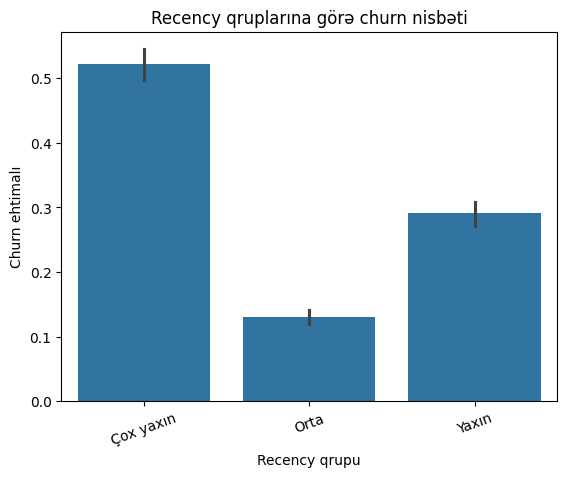

In [220]:
sns.barplot(data=data, x='recency_qrupu', y='Churn')
plt.title("Recency qruplarına görə churn nisbəti")
plt.ylabel("Churn ehtimalı")
plt.xlabel("Recency qrupu")
plt.xticks(rotation=20)
plt.show()

In [221]:
categ_cols=data.dtypes.pipe(lambda x : x [x=="object"]).index

for c in categ_cols:
    data[c], _ =pd.factorize(data[c])
data.head()

,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,onlayn yedəkləmə,...,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,recency_qrupu
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,29.85,29.85,0,0
1,1,0,1,0,34,1,1,0,1,1,...,0,0,0,1,1,1,56.95,1889.50,0,1
2,1,0,1,0,2,1,1,0,1,0,...,0,0,0,0,0,1,53.85,108.15,1,0
3,1,0,1,0,45,0,0,0,1,1,...,1,0,0,1,1,2,42.30,1840.75,0,1
4,2,0,1,0,2,1,1,1,0,1,...,0,0,0,0,0,0,70.70,151.65,1,0


In [222]:
from scipy.stats import pointbiserialr

for col in ['müddəti', 'Aylıq Ödənişlər', 'Ümumi ödənişlər']:
    corr, p_value = pointbiserialr(data[col].dropna(), data['Churn'].loc[data[col].notna()])
    print(f"{col}: correlation={corr:.2f}, p-value={p_value:.4f}")


müddəti: correlation=-0.35, p-value=0.0000
Aylıq Ödənişlər: correlation=0.19, p-value=0.0000
Ümumi ödənişlər: correlation=-0.20, p-value=0.0000


🔍 Classification Report:
               precision    recall  f1-score   support

Churn YOX (0)       0.84      0.76      0.80      1033
Churn VAR (1)       0.47      0.60      0.53       374

     accuracy                           0.71      1407
    macro avg       0.65      0.68      0.66      1407
 weighted avg       0.74      0.71      0.72      1407

[[781 252]
 [150 224]]


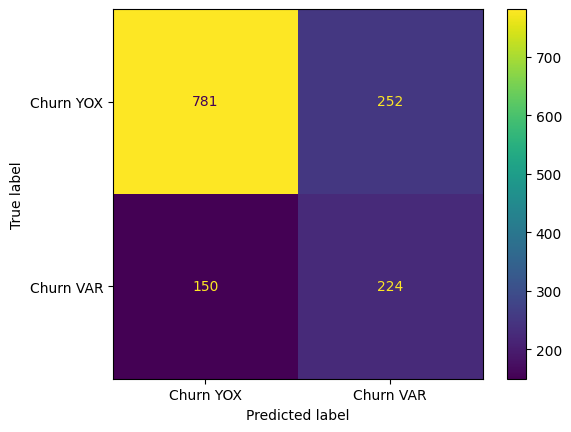

In [223]:

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)


rf_pred = rf_model.predict(X_test)


print("🔍 Classification Report:")
print(classification_report(y_test, rf_pred, target_names=["Churn YOX (0)", "Churn VAR (1)"]))

cm = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Churn YOX", "Churn VAR"]).plot()

print(cm)

🔍 XGBoost - Classification Report:
               precision    recall  f1-score   support

Churn YOX (0)       0.86      0.73      0.79      1033
Churn VAR (1)       0.48      0.68      0.56       374

     accuracy                           0.72      1407
    macro avg       0.67      0.70      0.67      1407
 weighted avg       0.76      0.72      0.73      1407



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:59:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


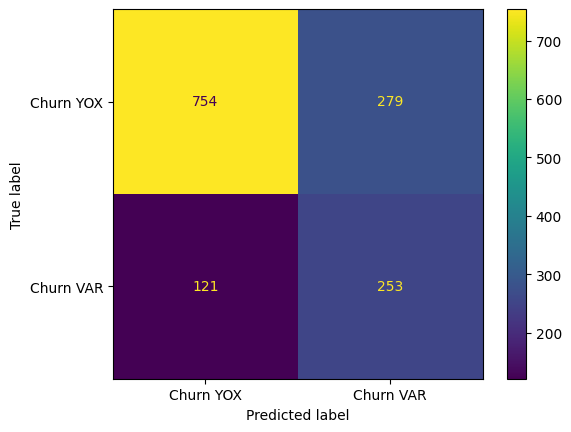

In [224]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_resampled, y_resampled)


xgb_pred = xgb_model.predict(X_test)


print("🔍 XGBoost - Classification Report:")
print(classification_report(y_test, xgb_pred, target_names=["Churn YOX (0)", "Churn VAR (1)"]))


cm = confusion_matrix(y_test, xgb_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Churn YOX", "Churn VAR"]).plot()


In [225]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Grid parametrlərini təyin edirik
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_resampled, y_resampled)

print("Ən yaxşı parametrlər:", grid_search.best_params_)
print("Ən yaxşı F1 score:", grid_search.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:00:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ən yaxşı parametrlər: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.7}
Ən yaxşı F1 score: 0.7822032407793839


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:00:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


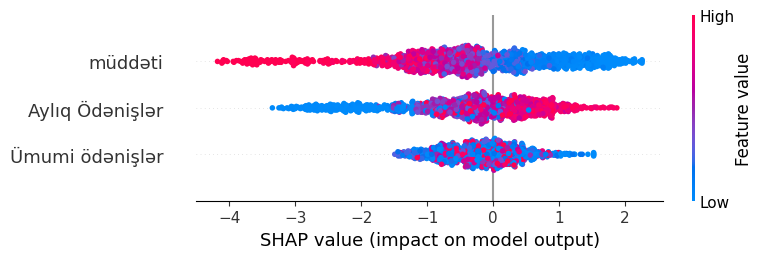

In [226]:
import shap


best_xgb = XGBClassifier(**grid_search.best_params_, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_xgb.fit(X_resampled, y_resampled)


explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [227]:
pip install catboost

In [228]:
cat_features = X_resampled.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_features)

[]


In [229]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report


best_params = {
    'iterations': 200,
    'depth': 6,
    'learning_rate': 0.1,
    'l2_leaf_reg': 3,
    'random_seed': 42,
    'verbose': 0
}

catboost_model = CatBoostClassifier(**best_params)

catboost_model.fit(X_resampled, y_resampled)


y_pred = catboost_model.predict(X_test)


print(classification_report(y_test, y_pred, target_names=["Churn YOX (0)", "Churn VAR (1)"]))


               precision    recall  f1-score   support

Churn YOX (0)       0.88      0.72      0.79      1033
Churn VAR (1)       0.49      0.73      0.59       374

     accuracy                           0.72      1407
    macro avg       0.68      0.73      0.69      1407
 weighted avg       0.78      0.72      0.74      1407



In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


lr = LogisticRegression(max_iter=1000, random_state=42)

lr.fit(X_resampled, y_resampled)

# Test datasında proqnozlar
lr_pred = lr.predict(X_test)

# Nəticələri çap et
print(classification_report(y_test, lr_pred, target_names=["Churn YOX (0)", "Churn VAR (1)"]))


               precision    recall  f1-score   support

Churn YOX (0)       0.88      0.72      0.79      1033
Churn VAR (1)       0.49      0.74      0.59       374

     accuracy                           0.72      1407
    macro avg       0.69      0.73      0.69      1407
 weighted avg       0.78      0.72      0.74      1407



In [231]:
y_probs = lr.predict_proba(X_test)[:,1]
threshold = 0.45
y_pred_threshold = (y_probs >= threshold).astype(int)

print(classification_report(y_test, y_pred_threshold, target_names=["Churn YOX (0)", "Churn VAR (1)"]))


               precision    recall  f1-score   support

Churn YOX (0)       0.91      0.66      0.77      1033
Churn VAR (1)       0.47      0.83      0.60       374

     accuracy                           0.71      1407
    macro avg       0.69      0.75      0.68      1407
 weighted avg       0.80      0.71      0.72      1407



In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer

model = LogisticRegression(max_iter=1000, random_state=42)


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scorer = make_scorer(f1_score)

scores = cross_val_score(model, X, y, cv=kf, scoring=f1_scorer)

print(f"5-fold cross-validation F1-score: {scores}")
print(f"Average F1-score: {scores.mean():.4f}")


5-fold cross-validation F1-score: [0.54317111 0.50793651 0.49842271 0.5150079  0.55572998]
Average F1-score: 0.5241


In [233]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

scores = cross_val_score(pipeline, X, y, cv=kf, scoring=f1_scorer)

print(f"5-fold cross-validation F1-score with SMOTE: {scores}")
print(f"Average F1-score: {scores.mean():.4f}")


5-fold cross-validation F1-score with SMOTE: [0.59707724 0.60567823 0.59163987 0.58189655 0.57356077]
Average F1-score: 0.5900


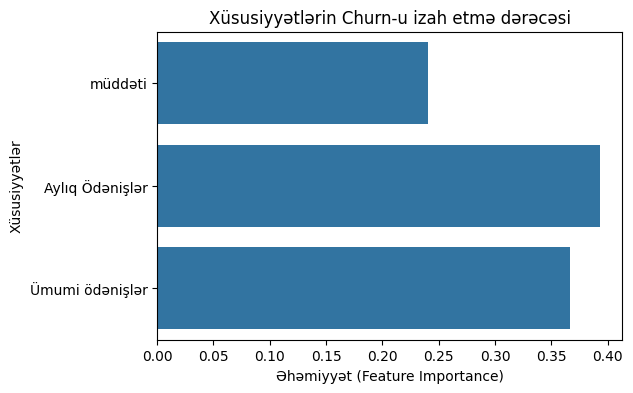

In [234]:
# feauture importAnce
importances = rf_model.feature_importances_
feature_names = X.columns


plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Xüsusiyyətlərin Churn-u izah etmə dərəcəsi")
plt.xlabel("Əhəmiyyət (Feature Importance)")
plt.ylabel("Xüsusiyyətlər")
plt.show()


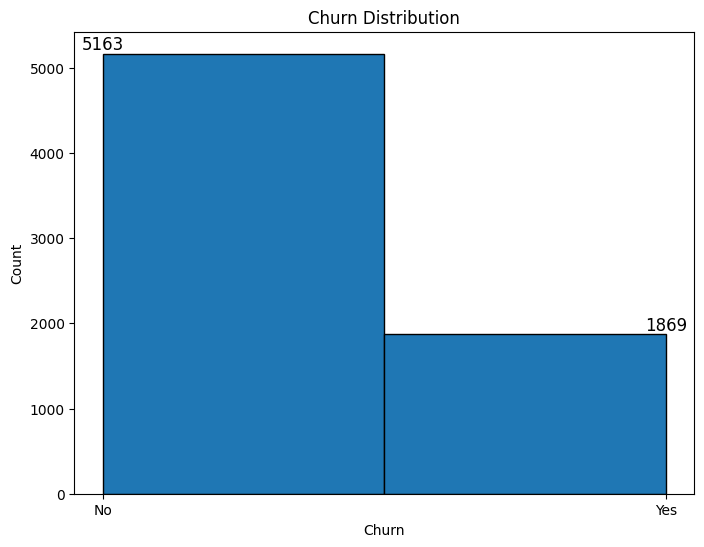

In [235]:
plt.figure(figsize=(8,6))
plt.hist(data["Churn"], bins=2, edgecolor='black')
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'])

# adding 0 and 1 to Churn
churn_counts = data["Churn"].value_counts()
for i, count in enumerate(churn_counts):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)

plt.title("Churn Distribution")
plt.show()


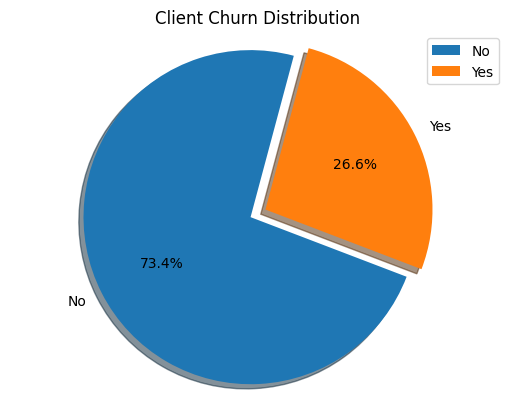

In [236]:
sizes=[5174,1879]
labels="No","Yes"
explode=(0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',labels=labels, shadow=True, startangle=75)
ax1.axis('equal')
ax1.set_title("Client Churn Distribution")
ax1.legend(labels)
plt.show()


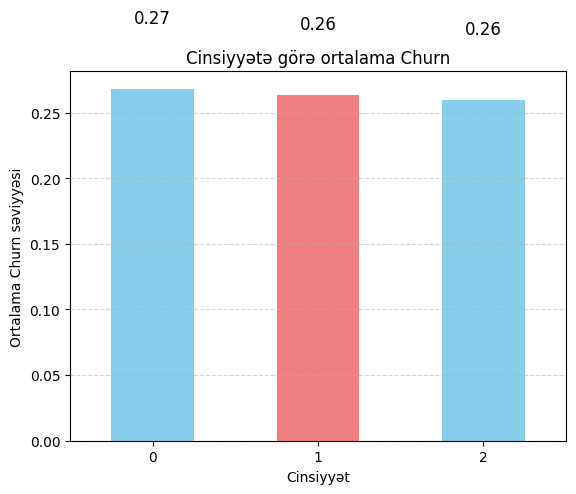

In [237]:
import matplotlib.pyplot as plt

# Churn by genderrrrr
churn_means = data.groupby("cinsiyyət")["Churn"].mean()

# Bar plot
ax = churn_means.plot(kind="bar", color=["skyblue", "lightcoral"])

plt.title("Cinsiyyətə görə ortalama Churn")
plt.xlabel("Cinsiyyət")
plt.ylabel("Ortalama Churn səviyyəsi")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

for i, value in enumerate(churn_means):
    ax.text(i, value + 0.05, f'{value:.2f}', ha='center', fontsize=12)

plt.show()


In [238]:
cat_cols = [col for col in data_copy.columns if data_copy[col].nunique() <= 10 and col != 'Churn']
print(cat_cols)


['cinsiyyət', 'Yaşlı təbəqə', 'tərəfdaş', 'asılı olanlar', 'Telefon Xidməti', 'Birdən çox xətt', 'İnternet servisi', 'onlayn təhlükəsizlik', 'onlayn yedəkləmə', 'Cihazın Mühafizəsi', 'texniki dəstək', 'canli tv', 'filmlər', 'müqavilə', 'Kağızsız Hesablaşma', 'ödəniş metodu', 'recency_qrupu']


<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


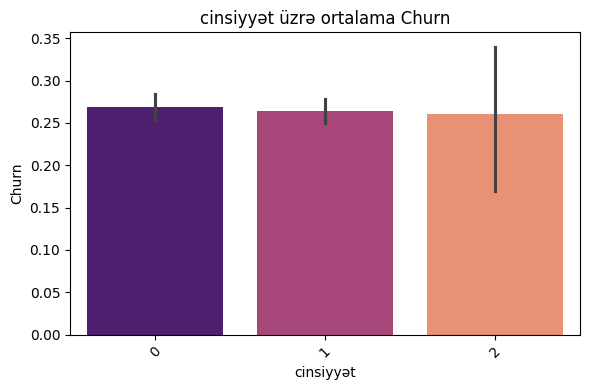

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


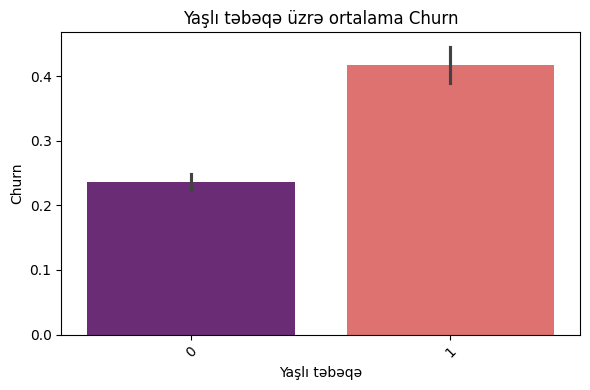

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


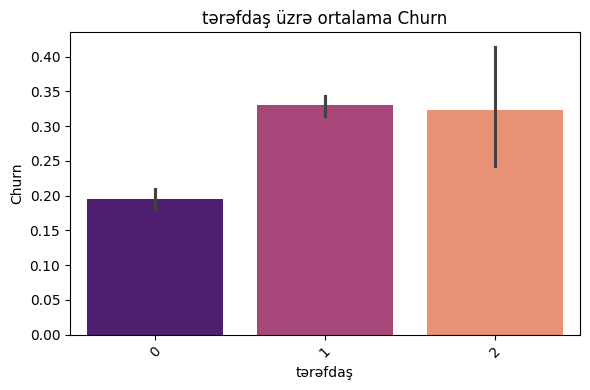

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


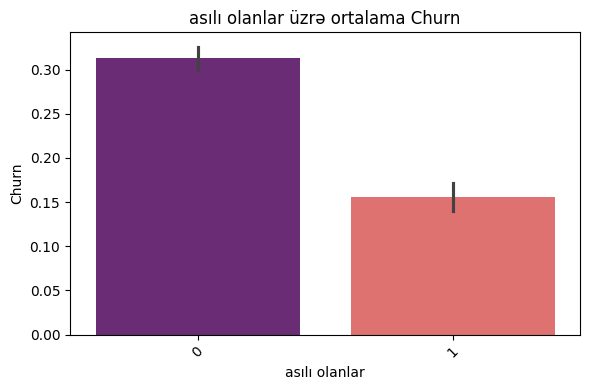

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


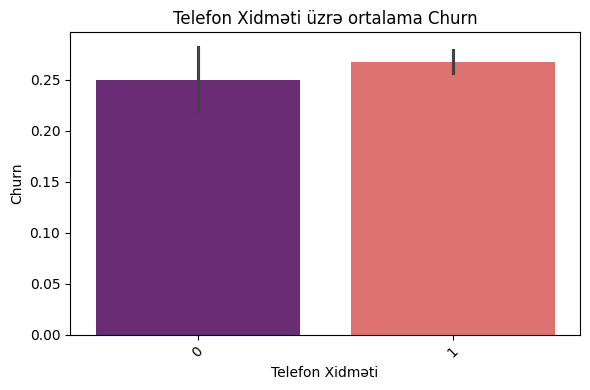

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


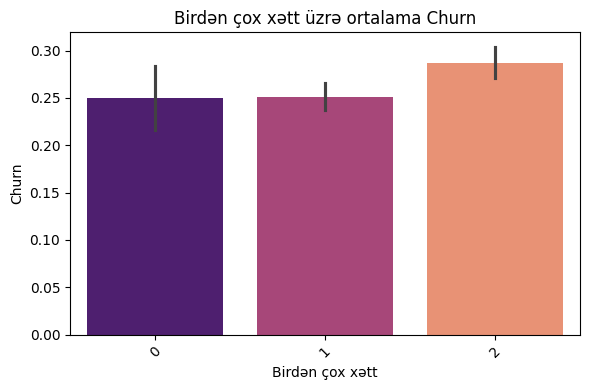

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


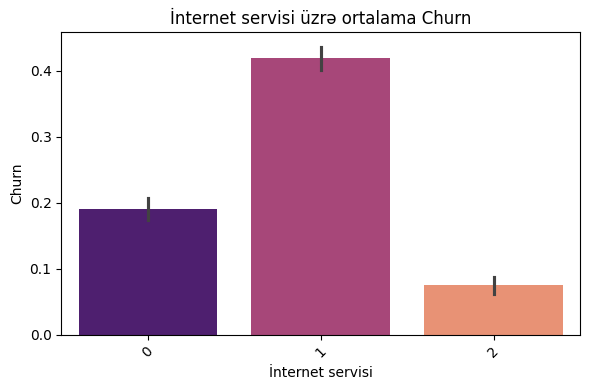

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


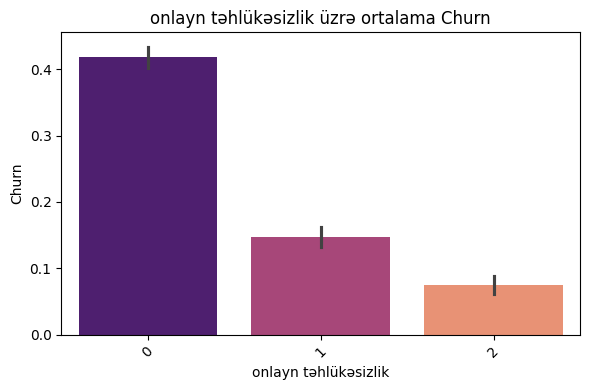

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


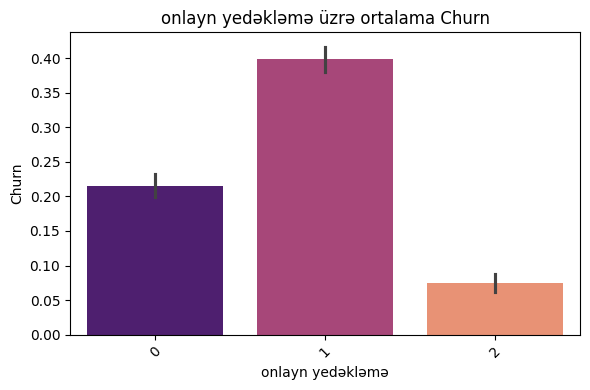

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


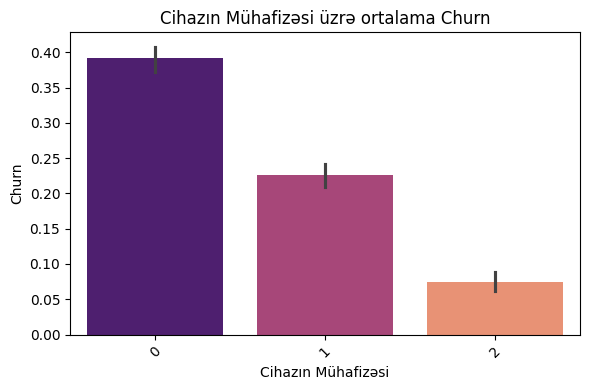

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


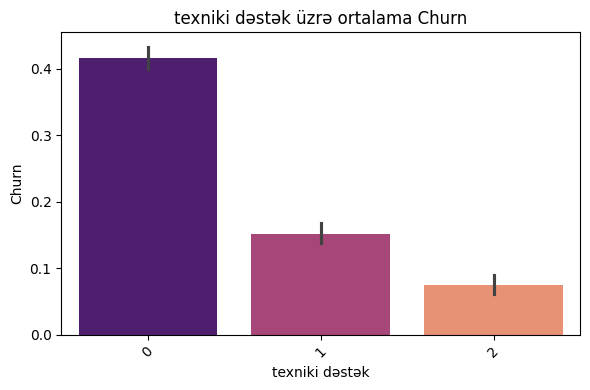

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


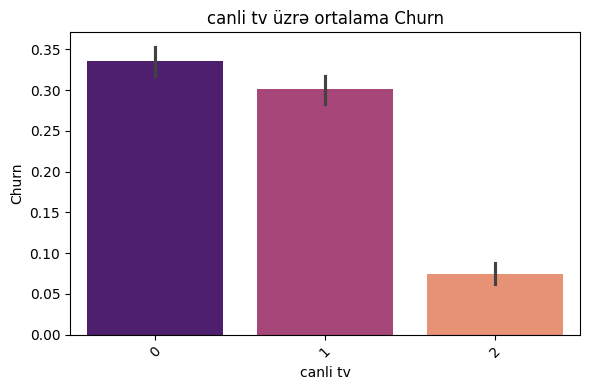

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


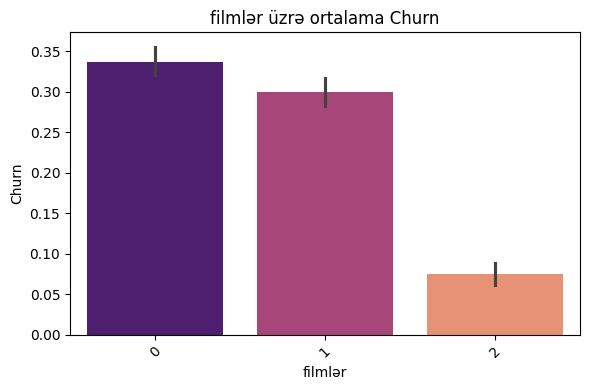

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


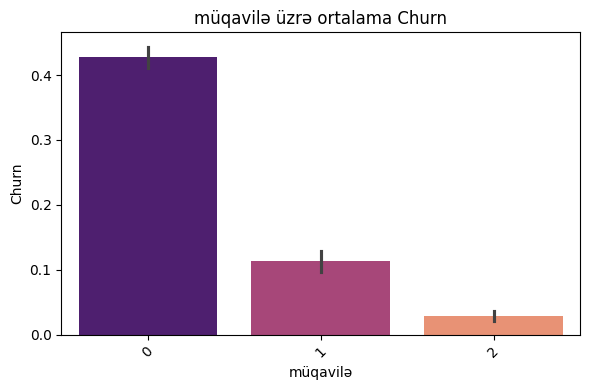

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


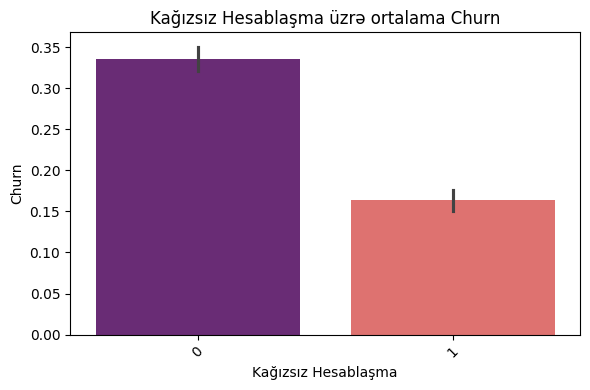

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


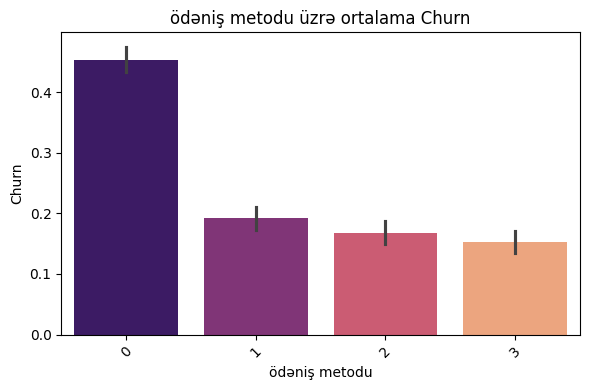

<ipython-input-239-27ce5ceed213>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')


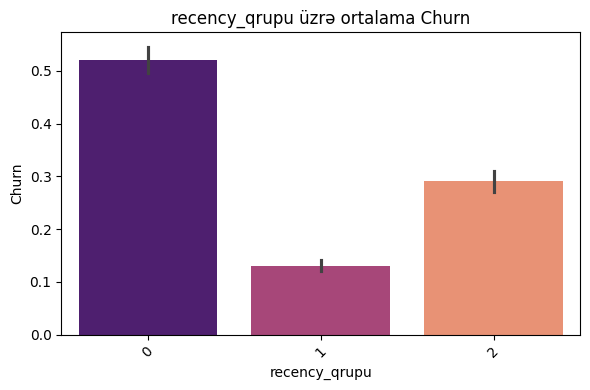

In [239]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Churn', data=data_copy, estimator=lambda x: sum(x)/len(x), palette='magma')
    plt.title(f"{col} üzrə ortalama Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


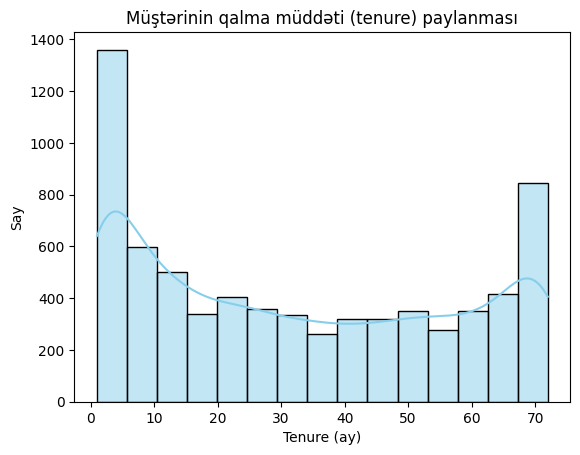

In [240]:
sns.histplot(data=data_copy, x="müddəti", kde=True, color="skyblue")
plt.title("Müştərinin qalma müddəti (tenure) paylanması")
plt.xlabel("Tenure (ay)")
plt.ylabel("Say")
plt.show()

<ipython-input-241-6998d89e1db7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=grouped, x='recency_qrupu', y='Churn', palette='Blues')


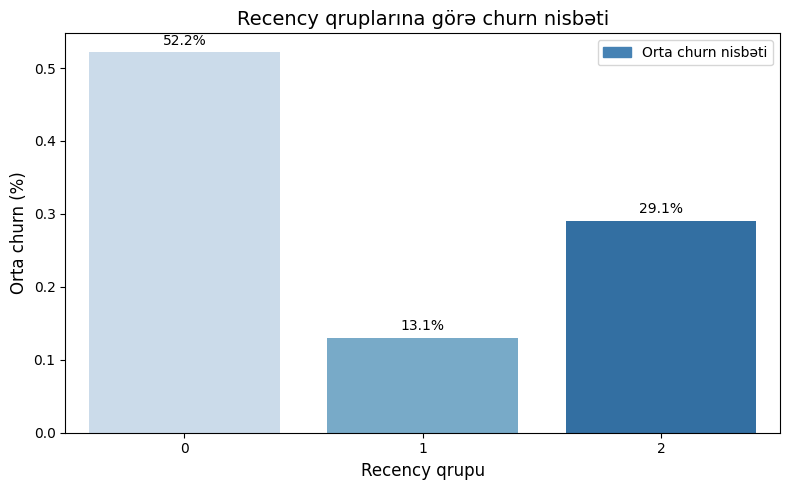

In [241]:
grouped = data.groupby('recency_qrupu')['Churn'].mean().reset_index()

plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=grouped, x='recency_qrupu', y='Churn', palette='Blues')

for i in range(len(grouped)):
    churn_pct = grouped['Churn'][i] * 100
    plt.text(i, grouped['Churn'][i] + 0.01, f"{churn_pct:.1f}%", ha='center', fontsize=10)

plt.title("Recency qruplarına görə churn nisbəti", fontsize=14)
plt.ylabel("Orta churn (%)", fontsize=12)
plt.xlabel("Recency qrupu", fontsize=12)


import matplotlib.patches as mpatches
legend_patch = mpatches.Patch(color='steelblue', label='Orta churn nisbəti')
plt.legend(handles=[legend_patch], loc='upper right')

plt.tight_layout()
plt.show()


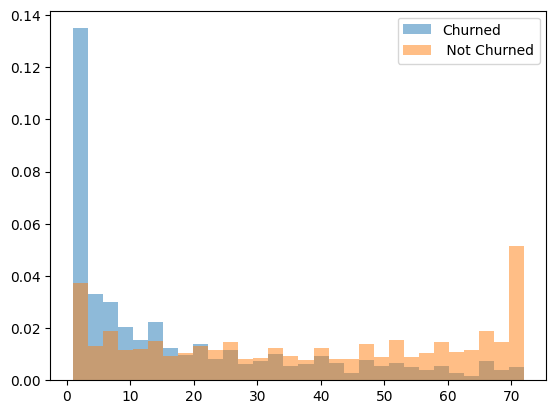

In [242]:
bins =30
plt.hist(data_copy[data_copy.Churn == 1].müddəti,
         bins, alpha=0.5, density=True,label="Churned")
plt.hist(data_copy[data_copy.Churn == 0].müddəti,
         bins, alpha=0.5, density=True,label=" Not Churned")
plt.legend(loc="upper right")
plt.show()

In [243]:
# Define the mapping based on the unique values in 'recency_qrupu'
recency_mapping = {value: index for index, value in enumerate(data['recency_qrupu'].unique())}

data['recency_qrupu_encoded'] = data['recency_qrupu'].map(recency_mapping)

# Drop the original 'recency_qrupu' column
data = data.drop(columns=['recency_qrupu'])


In [244]:
data['recency_qrupu_encoded'].value_counts()

,count
recency_qrupu_encoded,
1,3402
2,2029
0,1601
